Comparing azlearn AdaBoostClassifier and sklearn AdaBoostClassifier


C:\ProgramData\miniconda3\envs\machine_learning_env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Predictions comparison (first 20 samples)
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 0, azlearn: 1.0, sklearn: 0
Actual: 0, azlearn: 1.0, sklearn: 0
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 0, azlearn: 1.0, sklearn: 0
Actual: 0, azlearn: 1.0, sklearn: 0
Actual: 0, azlearn: 1.0, sklearn: 0
Actual: 1, azlearn: 1.0, sklearn: 0
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 0, azlearn: 1.0, sklearn: 0
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 0, azlearn: 1.0, sklearn: 0
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 0, azlearn: 1.0, sklearn: 0
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 1, azlearn: 1.0, sklearn: 1
Actual: 0, azlearn: 1.0, sklearn: 0

Accuracy comparison
azlearn AdaBoostClassifier accuracy: 0.6228
sklearn AdaBoostClassifier accuracy: 0.9737

Predicted probabilities comparison (first 5 samples)
azlearn: [0.49491718 0.50508282], sklearn: [0.44572328 0.55427672]
azlearn:

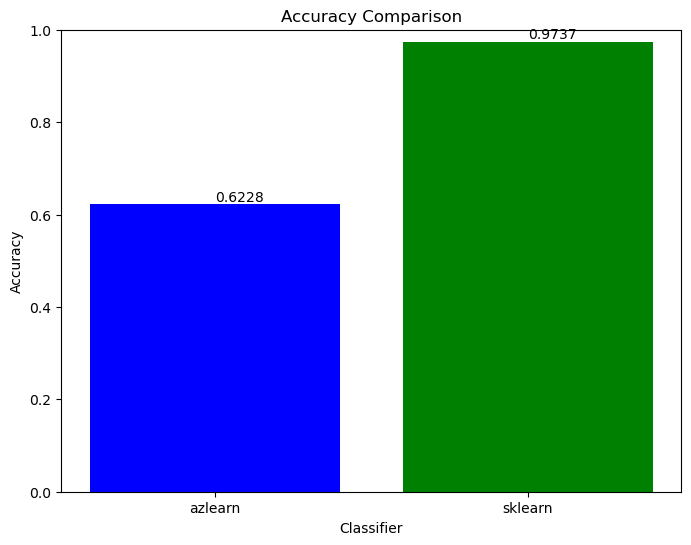

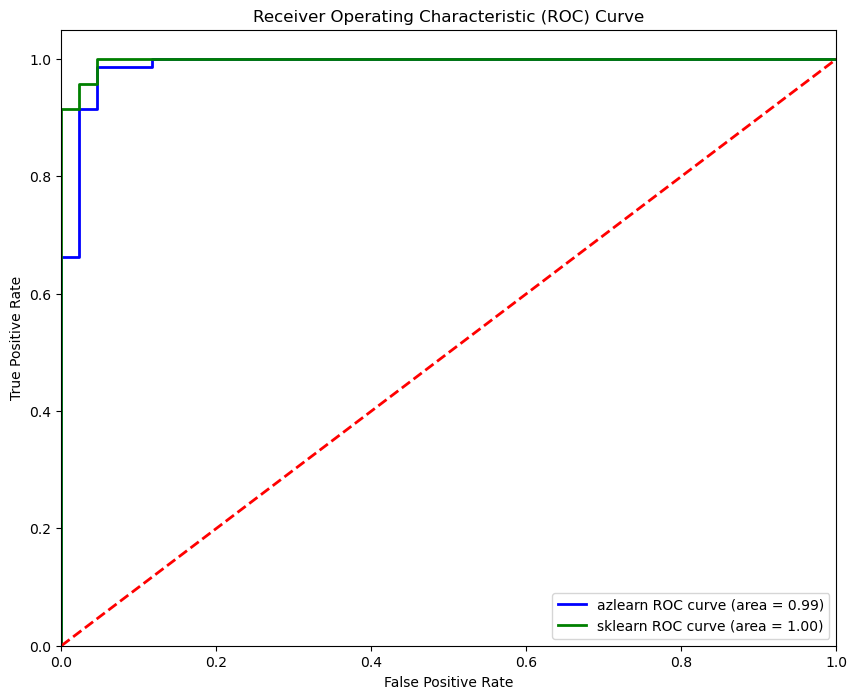

In [2]:
import sys
sys.path.insert(1, '../azlearn')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier as SklearnAdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from azlearn.ensemble.AdaBoost import AdaBoostClassifier
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

print("Comparing azlearn AdaBoostClassifier and sklearn AdaBoostClassifier")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train azlearn AdaBoostClassifier model
az_adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0)
az_adaboost_model.fit(X_train, y_train)

# Train sklearn AdaBoostClassifier model (for comparison)
sklearn_adaboost_model = SklearnAdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, random_state=42)
sklearn_adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_az = az_adaboost_model.predict(X_test)
y_pred_sklearn = sklearn_adaboost_model.predict(X_test)

# Print predictions comparison
print("Predictions comparison (first 20 samples)")
for i in range(min(len(y_pred_az), 20)):
    print(f"Actual: {y_test[i]}, azlearn: {y_pred_az[i]}, sklearn: {y_pred_sklearn[i]}")

# Evaluate models on the test set
accuracy_az = accuracy_score(y_test, y_pred_az)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("\nAccuracy comparison")
print(f"azlearn AdaBoostClassifier accuracy: {accuracy_az:.4f}")
print(f"sklearn AdaBoostClassifier accuracy: {accuracy_sklearn:.4f}")

# Predicted probabilities comparison
probas_az = az_adaboost_model.predict_proba(X_test)
probas_sklearn = sklearn_adaboost_model.predict_proba(X_test)
print("\nPredicted probabilities comparison (first 5 samples)")
for i in range(min(len(probas_az), 5)):
    print(f"azlearn: {probas_az[i]}, sklearn: {probas_sklearn[i]}")

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
classifiers = ['azlearn', 'sklearn']
accuracies = [accuracy_az, accuracy_sklearn]
bars = plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.ylim(0, 1.0)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom') 

plt.show()

# Plot ROC curve comparison
fpr_az, tpr_az, _ = roc_curve(y_test, probas_az[:, 1])
roc_auc_az = auc(fpr_az, tpr_az)
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, probas_sklearn[:, 1])
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_az, tpr_az, color='blue', lw=2, label=f'azlearn ROC curve (area = {roc_auc_az:.2f})')
plt.plot(fpr_sklearn, tpr_sklearn, color='green', lw=2, label=f'sklearn ROC curve (area = {roc_auc_sklearn:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
